In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

We are going to use MNIST dataset which has images of 0 to 9 handwritten digits.
we will import "input_data" which will help us load our data.'

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

We will make a directory (in this case: MNIST_dataset_directory) where our downloaded data will be saved. <br>
__one_hot__ will convert the class labels in a so-called one-hot array. Each unique label will be the column and in the array only one bit which corresponds to that column will be set (i.e '1'), rest will be '0'.

In [4]:
mnist = input_data.read_data_sets("MNIST_dataset_directory/", one_hot ="TRUE")

Extracting MNIST_dataset_directory/train-images-idx3-ubyte.gz
Extracting MNIST_dataset_directory/train-labels-idx1-ubyte.gz
Extracting MNIST_dataset_directory/t10k-images-idx3-ubyte.gz
Extracting MNIST_dataset_directory/t10k-labels-idx1-ubyte.gz


In [5]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000018A71AE0128>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000018A744EF7F0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000018A744EF710>)

In [6]:
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

In [7]:
trX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
trY[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

Check the dimention of the training and test data.<br>
In training dataset we have total 55000 images. Each represented by an array of size 784.

In [9]:
trX.shape, trY.shape, teX.shape, teY.shape

((55000, 784), (55000, 10), (10000, 784), (10000, 10))

Let's check how data looks like.
To print/ display a number we will reshape the linear way in which the image is represented into a square matrix of 28*28

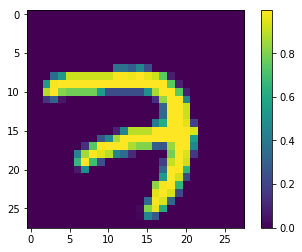

In [10]:
plt.imshow(trX[0].reshape(28, 28))
plt.colorbar()

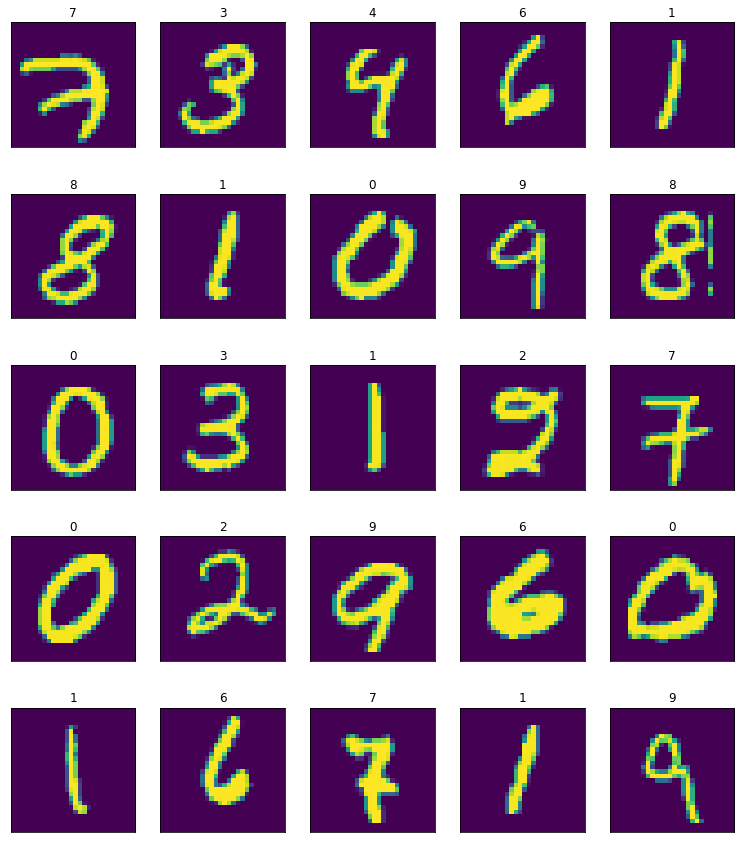

In [11]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(right=1.8, top=3.0)
    plt.imshow(trX[i].reshape(28, 28))
    plt.title(trY[i].argmax(axis=0))
    plt.xticks([])
    plt.yticks([])

We will create a placeholder for receiving the examples.<br>
A __placeholder__ is used to feed data into. *The only requirement is that in order to feed data, we need to match its shape and type exactly.* The TensorFlow website explains that “A placeholder exists solely to serve as the target of feeds. <br>
Here we have created a placeholder X which has type float and dimention [None, 784] which means there can be any number of rows and there should be 784 columns. 784 because in our training dataset we have each example of 784 dimentions (i.e one array is of lenghth 784. And each array represents an example.). And there are total 55000 examples. So we wrote None instead of any particular value( i.e 55000).<br>
'Y' is the target output.

In [12]:
X = tf.placeholder("float", [None, 784])
Y = tf.placeholder("float", [None, 10])

We will create the weight variable which our model will try to fit. Our w is a collection of 784 values for each of the 10 classes<br>
tf.zeros([2, 3], tf.int32) ==> [[0, 0, 0], [0, 0, 0]]

In [13]:
w = tf.Variable(tf.zeros([784,10]))

In [14]:
def model(X, w):
    return tf.matmul(X,w)

__Softmax__ assigns decimal probabilities to each class. Those probabilities add upto 1. <br>
So we have given y_model to the logits.<br>
__cross entropy__ is our loss function. It is applied between our target labels and the softmax activation function applied to the model's prediction.<br>
<br>
Notice that in our model() (above function) we have just multipled the input with the weights (similar to linear regression) because there is this loss function (tf.nn.softmax_cross_entropy_with_logits_v2) which performs both the softmax and cross entropy.
<br>
Then we have trained our model using Gradient Descent.
<br>
<br>
While making prediction we are taking the maximum value. Because y_model will give us 10 different values (shape of y_model is (?, 10)) so we will consider that value which has is bigger.

In [15]:
y_model = model(X,w)  # shape=(?, 10) dtype=float32

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = Y, logits = y_model))

train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

prediction = tf.argmax(y_model, 1) # we are taking maximum probability value. That will be our predicted Number. 

Now we will create the session.
We have initialized the variables. And we are training our network by exposing the training data 100 times. (epoch = 100).<br>
Here we have used Batch Gradient Descent technique. And make batches of 100.
<br>
After that we are testing our learned model on test data (by running our prediction variable by feeding test data). And stored all the results in "predicted_value"

In [16]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for i in range(100):  # Run 100 epochs
        batch = mnist.train.next_batch(100)
        sess.run(train_op , feed_dict = {X:batch[0] , Y:batch[1]})    
    
    predicted_value = sess.run(prediction, feed_dict={X: teX})
    
    #Calculating Accuracy
    correct_prediction = tf.equal(tf.argmax(y_model,1), tf.argmax(Y,1)) # Checking how much labels were equal. Returns Boolean
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # Convert in float. [True, False, True]==>[1.0, 0.0, 1.0]
    print("Accuracy: ", accuracy.eval(feed_dict={X: teX, Y: teY})) # Evaluating by feeding the test dataset.
    

Accuracy:  0.8513


Based on our prediction, we are plotting graphs on test dataset to check how many right and wrong predicts our model is making.
Titles of the graph are in color green (if prediction is correct) and red (when prediction is wrong).

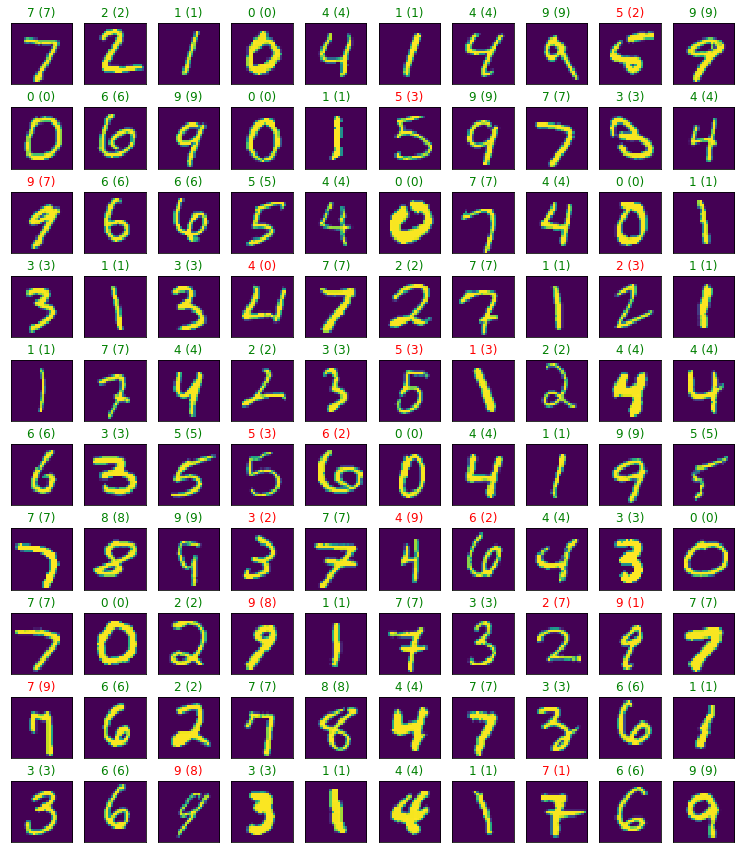

In [17]:
for i in range(100):
        plt.subplot(10,10,i+1)
        plt.subplots_adjust(right=1.8, top=3.0)
        plt.imshow(teX[i].reshape(28, 28))
        if teY[i].argmax(axis = 0) == predicted_value[i]:
            color = 'green'
        else:
            color = 'red'
        plt.title("{} ({})".format(teY[i].argmax(axis = 0),predicted_value[i]), color = color)
        plt.xticks([])
        plt.yticks([])
    